In [136]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


<h1>Exploring Data</h1>

In [138]:
df.shape

(962, 2)

In [139]:
df.dtypes

Category    object
Resume      object
dtype: object

In [144]:
labels = df["Category"].unique()
labels.sort()
labels

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [145]:
counts = df["Category"].value_counts()
counts

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

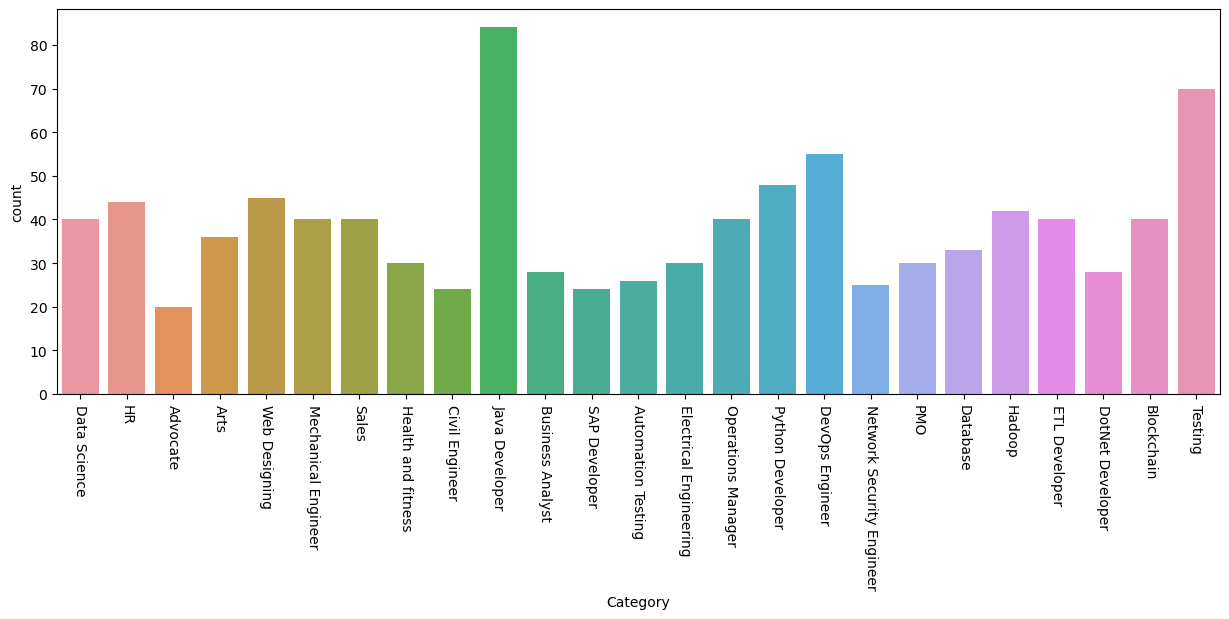

In [146]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=-90)
plt.show()

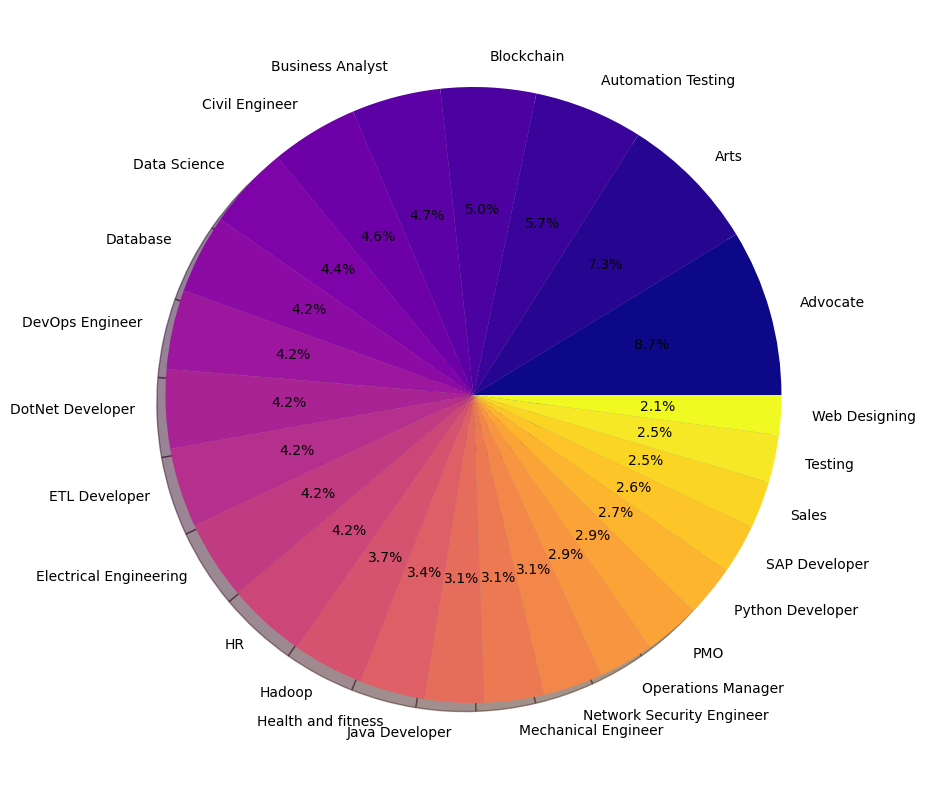

In [147]:
plt.figure(figsize= (15,10))
#colors = plt.cm.coolwarm can also be used
plt.pie(counts,labels=labels,autopct="%1.1f%%",shadow= True,colors=plt.cm.plasma(np.linspace(0,1,len(counts))))
plt.show()

<h1>Exploring Resume</h1>

In [148]:
df['Category'][0]

'Data Science'

In [149]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

<h1>Cleaning Data</h1>

In [150]:
import re #Regular Expression

In [151]:
def cleanResume(txt):
    cleanText = re.sub("http\S+"," ",txt)
    cleanText = re.sub("@\S+"," ",cleanText)
    cleanText = re.sub("#\S+"," ",cleanText)
    cleanText = re.sub("RT|cc\S+"," ",cleanText)
    cleanText = re.sub('[%s]'% re.escape("""#$%&*+,-./:;<=>?@[\]^_`{|}~""")," ",cleanText)
    cleanText = re.sub('\s+', ' ',cleanText)
    return cleanText

In [152]:
cleanResume(df['Resume'][0])

'Skills Programming Languages Python (pandas numpy scipy scikit learn matplotlib) Sql Java JavaScript JQuery Machine learning Regression SVM NaÃ¯ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling (LDA NMF) PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR (Technology Assisted Review) assists in a the rev

In [153]:
df["Resume"] = df["Resume"].apply(lambda x: cleanResume(x))
df['Resume'][961]

'Skill Set OS Windows XP 7 8 8 1 10 Database MYSQL sql server 2005 2008 2012 Languages Core Java Web Technology HTML CSS Testing Manual Testing Database Testing Other Bug tracking and reporting End user handling Education Details January 2016 MCS Pune Maharashtra P V P College Pravaranagar January 2011 HSC A K Junior College January 2009 SSC A K Mahavidyalya JR TESTING ENGINEER JR TESTING ENGINEER M Tech Innovations Ltd Skill Details TESTING Exprience 24 months WINDOWS XP Exprience 24 months CSS Exprience 6 months DATABASE Exprience 6 months DATABASE TESTING Exprience 6 monthsCompany Details company M Tech Innovations Ltd description Responsibilities â\x80¢ Analyzing the Testing Requirements â\x80¢ Preparing Test Plans Test Scenarios â\x80¢ Preparing Test Cases â\x80¢ Executing the test cases â\x80¢ Tracking bugs â\x80¢ Coordinating developers in order to fix it â\x80¢ Preparing test summary reports â\x80¢ Reporting quality manager â\x80¢ Attending meeting Projects Project Name 1 Web B

<h1>Words into Categorical Values</h1>

In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [155]:
le.fit(df["Category"])
df["Category"] = le.transform(df["Category"])

In [156]:
df

,Category,Resume
0,6,Skills Programming Languages Python (pandas nu...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills â¢ Proficient in MS office (W...
958,23,â Willingness to a the challenges â Positi...
959,23,PERSONAL SKILLS â¢ Quick learner â¢ Eagernes...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


<h1>Vectorization</h1>                        

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [158]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf.fit(df["Resume"])
requiredText  = tfidf.transform(df["Resume"])

<h1>Splitting</h1>

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(requiredText,df["Category"],test_size=0.2,random_state=42)

<h1>Training Model</h1>

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [165]:
clf = OneVsRestClassifier(KNeighborsClassifier())
# clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [166]:
accuracy_score(y_test,ypred)

0.9844559585492227

<h1>Prediction System</h1>

In [182]:
myResume = """
Professional Summary
Detail-oriented Civil Engineer with over 7 years of experience in designing, planning, and overseeing construction and maintenance of infrastructure projects. Proven expertise in project management, structural analysis, and environmental engineering. Adept at collaborating with multidisciplinary teams to deliver projects on time and within budget. Strong technical skills with a focus on sustainable and innovative engineering solutions.

Technical Skills
Engineering Software: AutoCAD, Civil 3D, STAAD.Pro, SAP2000, Revit
Project Management: MS Project, Primavera P6
Analysis Tools: MATLAB, RISA-3D
Construction Management: BIM, Procore
Surveying Tools: Total Station, GPS
Standards: ASCE, ACI, AISC, ASTM
Other Skills: Structural Design, Geotechnical Analysis, Hydraulics and Hydrology, Environmental Impact Assessment
Professional Experience
Senior Civil Engineer
XYZ Engineering Solutions, City, State
March 2018 – Present

Lead design and execution of infrastructure projects including bridges, roads, and commercial buildings, ensuring compliance with engineering standards and regulatory requirements.
Conduct structural analysis and design using software such as STAAD.Pro and SAP2000, enhancing structural integrity and safety.
Manage project schedules and budgets using MS Project, delivering projects on time and within financial constraints.
Collaborate with architects, contractors, and government officials to coordinate project activities and resolve issues.
Supervise and mentor junior engineers, fostering professional development and ensuring high-quality project deliverables.
Civil Engineer
ABC Construction Inc., City, State
June 2014 – February 2018

Designed and developed construction plans for residential and commercial buildings, utilizing AutoCAD and Civil 3D.
Performed site inspections and surveys to gather data and ensure adherence to design specifications and safety standards.
Prepared cost estimates and project proposals, contributing to successful bidding and acquisition of new projects.
Coordinated with subcontractors and suppliers to manage material procurement and logistics, optimizing project timelines and costs.
Conducted environmental impact assessments to identify and mitigate potential ecological risks associated with construction activities.
Education
Bachelor of Science in Civil Engineering
University of Technology, City, State
Graduated: May 2014

Certifications
Professional Engineer (PE) License, State of [Your State]
LEED Accredited Professional (LEED AP)
OSHA Safety Certification
Projects
Highway Expansion Project



"""

In [183]:
import pickle

In [184]:
pickle.dump(tfidf,open("tfidf.pkl","wb"))
pickle.dump(clf,open("clf.pkl","wb"))

In [185]:
clf = pickle.load(open("clf.pkl","rb"))
cleaned_resume = cleanResume(myResume)

In [186]:
input_features = tfidf.transform([cleaned_resume])
prediction_id = clf.predict(input_features)[0]

In [187]:
category_mapping = {
    0:'Advocate', 
    1:'Arts', 
    2:'Automation Testing', 
    3:'Blockchain',
    4:'Business Analyst', 
    5:'Civil Engineer', 
    6:'Data Science', 
    7:'Database',
    8:'DevOps Engineer', 
    9:'DotNet Developer', 
    10:'ETL Developer',
    11: 'Electrical Engineering', 
    12:'HR', 
    13:'Hadoop', 
    14:'Health and fitness',
    15:'Java Developer', 
    16:'Mechanical Engineer',
    17:'Network Security Engineer', 
    18:'Operations Manager', 
    19:'PMO',
    20:'Python Developer', 
    21:'SAP Developer', 
    22:'Sales', 
    23:'Testing',
    24:'Web Designing'
}

In [188]:
category_name = category_mapping.get(prediction_id,"Unknown")
category_name

'Civil Engineer'